In this exercise, I analyze data from the elec.temp data set from the SemiPar R package. The elec.temp data frame has 55 observations on monthly electricity usage and average temperature for a house in Westchester County, New York, USA. The 'usage' variable contains monthly electricity usage (kilowatt-hours) from the house and the 'temp' variable contains average temperature (degrees Fahrenheit) for the corresponding month.

This data comes from: Chatterjee, S., Handcock, M. and Simonoff, J.S. (1995). $\textit{A Casebook for a First Course in Statistics and Data Analysis}$, New York: John Wiley & Sons.

In [1]:
#Install SemiPar
#install.packages("SemiPar", repos="http://cran.rstudio.com/") #install package

In the first part of the exercise, I perform a simple linear regression using temperature as the predictor variable and the logarithm of the electricity usage as the response and find the least square estimates for the coefficients. I also calculate a 95% confidence interval for both coefficients.

In [2]:
library(SemiPar)
data(elec.temp)
Y <- log(elec.temp$usage) # Response
X <- elec.temp$temp # Predictor
n <- length(X)

lm <- lm(Y~X)
(lms <- summary(lm))

coefficient <- c('beta0', 'beta1')

beta0.hat <- (coef(lms)[1])
beta1.hat <- (coef(lms)[2])
beta.hat <- c(beta0.hat, beta1.hat)

txx <- sum((X - mean(X))^2) #Total Sum of Squares
MSE <- sum(lms$residuals^2)/(n-2) #Mean Squared Error

# Calculate standard deviations
s.beta0.hat <- sqrt(MSE * (1/n + mean(X)^2/(txx)))
s.beta1.hat <- sqrt(MSE/txx)
s.beta.hat <- c(s.beta0.hat, s.beta1.hat)

Yhat <- beta0.hat + beta1.hat * X

lower.bound <- beta.hat - qt(1 - 0.05/2, df = n-2)*s.beta.hat
upper.bound <- beta.hat + qt(1 - 0.05/2, df = n-2)*s.beta.hat

(beta.intervals <- cbind(coefficient, lower.bound, beta.hat, upper.bound))


Call:
lm(formula = Y ~ X)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.69713 -0.14270  0.04786  0.14938  0.40749 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.335194   0.120312   44.34   <2e-16 ***
X           -0.031874   0.002149  -14.83   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2455 on 53 degrees of freedom
Multiple R-squared:  0.8058,	Adjusted R-squared:  0.8022 
F-statistic: 219.9 on 1 and 53 DF,  p-value: < 2.2e-16


coefficient,lower.bound,beta.hat,upper.bound
beta0,5.0938793253104,5.33519415630185,5.5765089872933
beta1,-0.0361846556912576,-0.0318738124075921,-0.0275629691239266


In the second part of this exercise, I set up a hypothesis test to test whether electricity usage is associated with the temperature in the house. I use a significance level of 0.05 for the test and also calculate the p-value of this test.

#### Hypothesis Test:


Null hypothesis $H_0: \beta_1 = 0$ (There is no relationship between electricity usage and temperature.)

vs.

Alternative hypothesis $H_A: \beta_1 ≠ 0$ (There is a relationship between electricity usage and house temperature.)

In [3]:
# Hypothesis test

(T <- coef(lms)[, "t value"][2]) #Extract T-statistic

#Calculate the 97.5% quantile level for the Student t distribution with 53 df
(QT <- qt(1 - .05/2, df = n-2))

(reject <- abs(T) > QT)
# We reject the null hypothesis

(p.value <- coef(lms)[, "Pr(>|t|)"][2])

X 
-14.83022

[1] 2.005746

X 
TRUE

X 
1.661387e-20

Since the absolute value of my T-statistic was much greater than the 97.5% quantile level for the Student t-distribution with n-2 degrees of freedom, I reject the null hypothesis and conclude that there is evidence to suggest that there exists a relationship between electricity usage and house temperature.

Additionally, the small p-value suggests that there is fairly strong evidence of a relationship.

In the third part of this exercise, I predict electricity usage when the temperature is 40ºF, 70ºF and 100ºF and provide a 95% confidence interval for the electricity usage at each the 3 temperatures.

In [4]:
# Predict electricity usage at 40, 70 and 100 degrees F along with the
# 95% confidence interval for each temperature

x.pred <- c(40, 70, 100)
yhat.pred <- beta0.hat + beta1.hat * x.pred

s.pred <- sqrt(MSE * (1 + 1/n + (x.pred - mean(X))^2/txx))

lower.pred <- yhat.pred - qt(1 - 0.05/2, df = n-2) * s.pred
upper.pred <- yhat.pred + qt(1 - 0.05/2, df = n-2) * s.pred
(pred.intervals <- cbind(x.pred, lower.pred, yhat.pred, upper.pred))

x.pred,lower.pred,yhat.pred,upper.pred
40.000000,3.559843,4.060242,4.560640
70.000000,2.602314,3.104027,3.605740
100.000000,1.612571,2.147813,2.683055


In the last part of this exercise, I find the equation defining the 95% confidence band for the regression line using the Working-Hotelling approach. I then compare this with the 95% confidence band obtained by combining the individual 95% confidence interval for $\beta_0$ with the 95% confidence interval for $\beta_1$.

The red dashed lines represent the 95% Working-Hotelling confidence band, the blue dotted lines represent the 95% joint confidence interval for $\beta_0$ and $\beta_1$ and the solid black line represents the least squares estimated regression line.

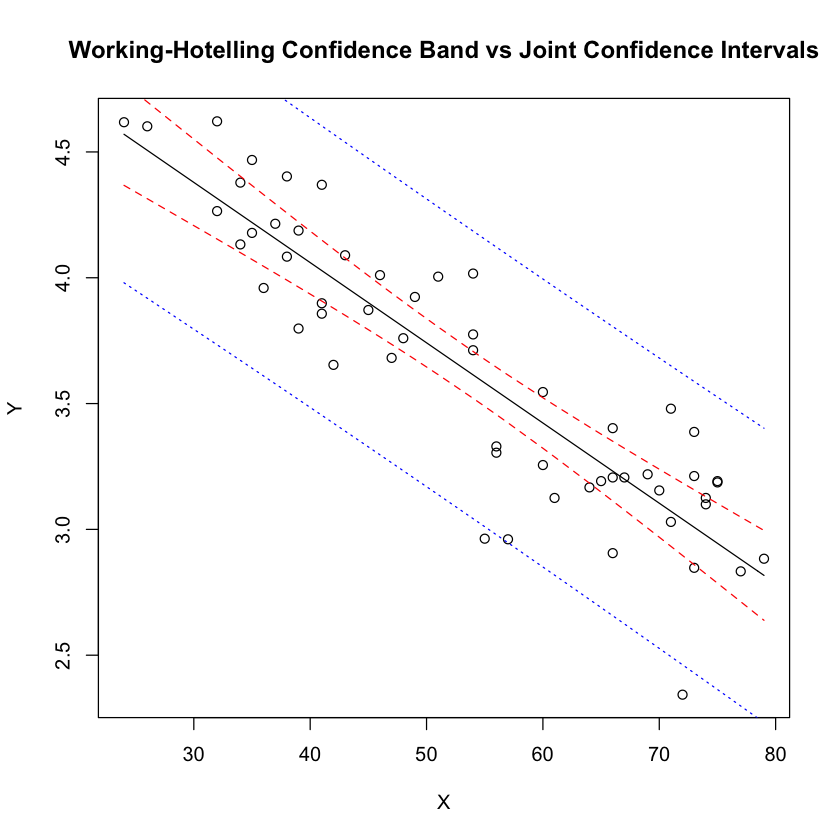

In [5]:
## Compute the 95% Working-Hotelling Confidence Band

W <- sqrt(2 * qf(1 - 0.05/2, 2, n-2))
s.WH <- sqrt(MSE * (1/n + (X - mean(X))^2/txx))

# Equation defining the 95% confidence band for the regression line using the Working-Hotelling approach
lower.WH <- Yhat - W * s.WH
upper.WH <- Yhat + W * s.WH

# Equation for the 95% join confidence interval
B <- qt(1 - 0.05/4, df = n-2)
s.pred <- sqrt(MSE * (1 + 1/n + (X - mean(X))^2/txx))
lower.B <- Yhat - B * s.pred
upper.B <- Yhat + B * s.pred

plot(X, Y, main="Working-Hotelling Confidence Band vs Joint Confidence Intervals")
X.ordering <- order(X)
lines(X[X.ordering], lower.WH[X.ordering], lty = 2, col = "red")
lines(X[X.ordering], upper.WH[X.ordering], lty = 2, col = "red")

lines(X[X.ordering], lower.B[X.ordering], lty = 3, col = 'blue')
lines(X[X.ordering], upper.B[X.ordering], lty = 3, col = 'blue')

curve(beta0.hat + beta1.hat*x, seq(min(X),max(X),by=1), add = TRUE)